1.MSSV: 19522351

2.Họ tên: Trần Trung Tín

3.Bài tập: 5

#Kết nối đến google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dir_monhoc = '/content/drive/MyDrive/CS231.M12.KHCL'
dir_baitap = os.path.join(dir_monhoc, 'Baitap', 'Baitap5')
dir_images = os.path.join(dir_baitap, 'images')

#Khai báo thư viện

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift, estimate_bandwidth

#GrabCut:

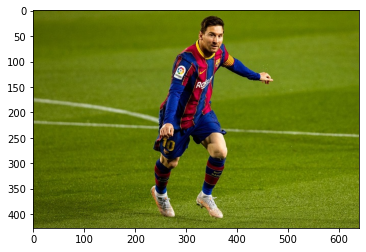

In [ ]:
path_messi = os.path.join(dir_images, 'Lionel-Messi.jpg')
img1 = cv.imread(path_messi)
plt.imshow(img1[:,:,::-1])
plt.show()

In [ ]:
def GraphSeg(path_filename, x, y, w, h):
  img = cv.imread(path_filename)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  img_rec = img.copy()
  img_rec = cv.rectangle(img_rec, (x, y), (x+w, y+h), (255, 0, 0), 2)
  plt.imshow(img_rec)
  plt.show()
  print(img.shape)
  mask = np.zeros(img.shape[:2], np.uint8)
  backgroundModel = np.zeros((1, 65), np.float64)
  foregroundModel = np.zeros((1, 65), np.float64)
  rectangle = (x, y, w, h)
  cv.grabCut(img, mask, rectangle, 
              backgroundModel, foregroundModel, 
              5, cv.GC_INIT_WITH_RECT)
  mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
  res = img * mask2[:, :, np.newaxis]
  plt.imshow(res)
  plt.show()
  res = cv.cvtColor(res, cv.COLOR_BGR2RGB)

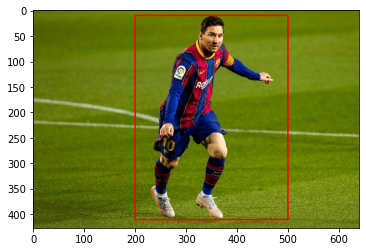

(427, 640, 3)


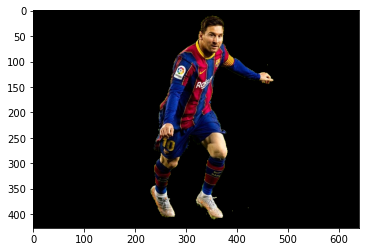

In [ ]:
GraphSeg(path_messi, 200, 10, 300, 400)

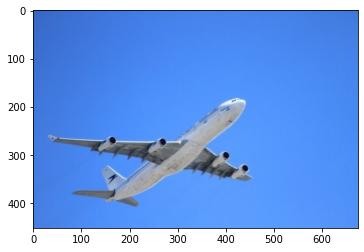

In [ ]:
path_airplane = os.path.join(dir_images, 'airplane.jpg')
img2 = cv.imread(path_airplane)
plt.imshow(img2[:,:,::-1])
plt.show()

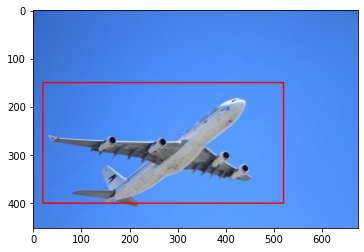

(452, 675, 3)


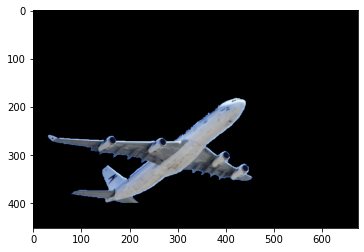

In [ ]:
GraphSeg(path_airplane, 20, 150, 500, 250)